In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
from folium.plugins import MarkerCluster
from bs4 import BeautifulSoup

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =  False

seoul_addr = pd.read_csv('서울도로명좌표_주문정보.csv',encoding = 'utf-8')
#seoul_addr = pd.read_csv('서울도로명좌표_주문정보.csv',encoding = 'cpq')
o_info = pd.read_excel('3.1 주문정보(개인정보 제외)_추출.xlsx')
i_info = pd.read_excel('2.1 상품정보_추출.xlsx')


#  1. 데이터 정보 나열

## 1-1 서울도로명주소

In [2]:
seoul_addr

,sido,gu,dong,"ro,gil",Iat,lng
0,서울,영등포구,여의동,국제금융로2길,37.5240224,126.925446
1,서울,영등포구,여의동,국제금융로,37.5195871,126.9331448
2,서울,영등포구,도림동,도영로,37.5086983,126.8956217
3,서울,영등포구,신길3동,가마산로69가길,37.5063252,126.9093275
4,서울,강서구,우장산동,우현로,37.54797,126.8407763
...,...,...,...,...,...,...
2226,서울,노원구,중계2·3동,동일로204가길,37.6415281,127.0672992
2227,서울,성북구,정릉4동,솔샘로,37.6127793,127.0073961
2228,서울,관악구,신원동,신원로1길,37.4800764,126.9268707
2229,서울,강서구,화곡1동,곰달래로20길,37.5293141,126.8442668


## 1-2 주문정보

In [3]:
o_info

,주문번호,순번,주문일시,진행구분,배송지,상품번호,상품명,옵션명,수량,판매가,배송비,쿠폰할인액,회원주문여부,회원번호
0,1711080845542139,1,2017-11-08 08:46:26,환불완료,서울 영등포구 국제금융로2길 32,G1710311847_6746,(임직원 전용)[케라미카] 바뎀 2인홈세트 (11p),NaN,1,48840.0,0.0,9760.0,Y,1876
1,1711080902432145,1,2017-11-08 09:04:28,결제취소,서울 영등포구 국제금융로2길 32,G1710311849_6973,(임직원 전용)[아름다운공간] 스윗도자기 원형디스펜서 (2color/400ml),색상:핑크,1,7800.0,2500.0,1560.0,Y,1876
2,1711080932562165,1,2017-11-08 09:33:20,결제취소,서울 영등포구 국제금융로2길 32,G1710311843_6700,(임직원 전용)[런드레스] 울 캐시미어 스프레이 세다 cedar (4 fl.oz),NaN,1,16200.0,0.0,3240.0,Y,1882
3,1711080934572167,1,2017-11-08 09:35:19,환불완료,서울 영등포구 국제금융로2길 32,G1710311906_7061,(임직원 전용)[트레비앙] 전동 와인 오프너_DM-503,NaN,1,35040.0,3000.0,7000.0,Y,1882
4,1711080944432170,1,2017-11-08 09:45:08,결제취소,서울 영등포구 국제금융로2길 32,G1710311843_6698,(임직원 전용)[런드레스] 패브릭 프레쉬 베이비 Baby (4 fl.oz.),NaN,1,16200.0,0.0,3240.0,Y,1882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24761,1811062357169433,5,2018-11-06 23:59:03,결제완료,경남 진주시 내동면 순환로 425-61,G1805311432_8296,[월플랜] 셀프도배 전문가세트_(풀바른벽지 /롤벽지 택1),종류:전문가세트(풀바른벽지편),1,28000.0,0.0,0.0,Y,57778
24762,1811070212309446,2,2018-11-07 02:21:54,결제완료,충북 청주시 상당구 단재로 316,G1805311443_8348,[월플랜] 풀바른실크벽지 (뮬리 트윙클화이트)_H7011-1,"종류:만능풀바른벽지,벽높이 선택:230cm",3,29700.0,0.0,4460.0,Y,54164
24763,1811070212309446,3,2018-11-07 02:21:54,결제완료,충북 청주시 상당구 단재로 316,G1805311729_8951,[월플랜] 정배솔,NaN,1,12000.0,0.0,1800.0,Y,54164
24764,1811070212309446,4,2018-11-07 02:21:54,결제완료,충북 청주시 상당구 단재로 316,G1806051452_0740,[월플랜] 풀바른합지벽지 (샤인패브릭 바이올렛)_LG54021-6,"종류:만능풀바른벽지,벽높이 선택:230cm",9,53100.0,0.0,7970.0,Y,54164


## 1-3 상품정보

i_info

# 2. 데이터 전처리

##  2-1 주문정보 정제

In [4]:
df_주문정보_사본 = o_info.copy()
df_주문정보_사본.drop(columns = ['순번', '옵션명', '회원주문여부','상품명'],inplace = True)

In [5]:
df_주문정보_사본.drop(df_주문정보_사본.loc[df_주문정보_사본.진행구분 == '환불완료'].index,inplace = True)
df_주문정보_사본.drop(df_주문정보_사본.loc[df_주문정보_사본.진행구분 == '결제취소'].index,inplace = True)
df_주문정보_사본.drop(df_주문정보_사본.loc[df_주문정보_사본.진행구분 == '환불신청'].index,inplace = True)
df_주문정보_사본.drop(df_주문정보_사본.loc[df_주문정보_사본.진행구분 == '주문취소'].index,inplace = True)

In [6]:
df_주문정보_사본

,주문번호,주문일시,진행구분,배송지,상품번호,수량,판매가,배송비,쿠폰할인액,회원번호
12,1711091120092237,2017-11-09 11:23:07,구매확정,강원 춘천시 동산면 영서로 915,G1709201602_1482,5,16000.0,2500.0,0.0,1972
13,1711091146582243,2017-11-09 11:49:04,구매확정,경기 고양시 일산서구 고양대로 633,G1710161420_3420,1,52900.0,0.0,0.0,2005
14,1711091330402269,2017-11-09 13:33:28,구매확정,인천 연수구 송도과학로27번길 30,G1710121442_3146,1,43000.0,0.0,0.0,1953
16,1711101906332340,2017-11-10 19:11:26,구매확정,서울 영등포구 국제금융로2길 32,G1711011727_7485,1,59400.0,0.0,11880.0,2495
17,1711110827422358,2017-11-11 08:33:10,구매확정,세종특별자치시 금남면 두만길 12-1,G1710161740_3520,1,11690.0,2500.0,2330.0,2365
...,...,...,...,...,...,...,...,...,...,...
24761,1811062357169433,2018-11-06 23:59:03,결제완료,경남 진주시 내동면 순환로 425-61,G1805311432_8296,1,28000.0,0.0,0.0,57778
24762,1811070212309446,2018-11-07 02:21:54,결제완료,충북 청주시 상당구 단재로 316,G1805311443_8348,3,29700.0,0.0,4460.0,54164
24763,1811070212309446,2018-11-07 02:21:54,결제완료,충북 청주시 상당구 단재로 316,G1805311729_8951,1,12000.0,0.0,1800.0,54164
24764,1811070212309446,2018-11-07 02:21:54,결제완료,충북 청주시 상당구 단재로 316,G1806051452_0740,9,53100.0,0.0,7970.0,54164


In [7]:
#'서울특별시'를 '서울'으로만 저장
df_서울만 = df_주문정보_사본[df_주문정보_사본['배송지'].str.find('서울') == 0].copy()
df_서울만['배송지'] = df_서울만['배송지'].str[0:2] + ' '+ df_서울만['배송지'].str.split().str[1]\
                                + ' ' + df_서울만['배송지'].str.split().str[2]
df_서울주문정보 = df_서울만.copy()

In [8]:
#주문일시 datetime 변환
df_서울주문정보['주문일시'] = pd.to_datetime(df_서울주문정보["주문일시"])
df_서울주문정보['주문일시'] = pd.to_datetime(df_서울주문정보['주문일시'].dt.date)
#df_서울주문정보['주문일시']

In [9]:
df_서울주문정보.info()#결측치 없음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 16 to 24757
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   주문번호    6172 non-null   int64         
 1   주문일시    6172 non-null   datetime64[ns]
 2   진행구분    6172 non-null   object        
 3   배송지     6172 non-null   object        
 4   상품번호    6172 non-null   object        
 5   수량      6172 non-null   int64         
 6   판매가     6172 non-null   float64       
 7   배송비     6172 non-null   float64       
 8   쿠폰할인액   6172 non-null   float64       
 9   회원번호    6172 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 530.4+ KB


In [10]:
df_서울주문정보

,주문번호,주문일시,진행구분,배송지,상품번호,수량,판매가,배송비,쿠폰할인액,회원번호
16,1711101906332340,2017-11-10,구매확정,서울 영등포구 국제금융로2길,G1711011727_7485,1,59400.0,0.0,11880.0,2495
22,1711110937312377,2017-11-11,구매확정,서울 영등포구 국제금융로,G1710190941_3830,1,6090.0,2500.0,1210.0,2087
23,1711110948582381,2017-11-11,구매확정,서울 강서구 우현로,G1710311906_7053,1,41160.0,3000.0,8230.0,2187
26,1711111044212397,2017-11-11,구매확정,서울 영등포구 가마산로,G1710311909_7102,1,57120.0,0.0,11420.0,2083
28,1711111046022403,2017-11-11,구매확정,서울 마포구 마포대로,G1710171249_3610,1,10680.0,2500.0,2130.0,2016
...,...,...,...,...,...,...,...,...,...,...
24753,1811062318309430,2018-11-06,결제완료,서울 강서구 곰달래로20길,G1806010933_9050,8,44800.0,0.0,6720.0,57776
24754,1811062318309430,2018-11-06,결제완료,서울 강서구 곰달래로20길,G1806041540_0335,4,22400.0,0.0,3360.0,57776
24755,1811062343329431,2018-11-06,배송중,서울 동작구 상도로31길,G1804101018_2527,1,5900.0,0.0,0.0,0
24756,1811062343329431,2018-11-06,배송중,서울 동작구 상도로31길,G1804111424_3127,1,29900.0,0.0,0.0,0


## 2-2 도로명 주소 정제

In [11]:
df_서울도로명주소= seoul_addr.copy()

In [12]:
siguro = df_서울도로명주소['sido']+ ' '+df_서울도로명주소['gu']+ ' '+df_서울도로명주소['ro,gil']
sigudong = df_서울도로명주소['sido']+ ' '+df_서울도로명주소['gu']+ ' '+df_서울도로명주소['dong']

In [13]:
df_서울도로명주소.insert(0,'si_gu_ro,gil',siguro)
df_서울도로명주소.insert(1,'si_gu_dong',sigudong)

In [14]:
df_서울도로명주소.info()#결측치없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231 entries, 0 to 2230
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   si_gu_ro,gil  2231 non-null   object
 1   si_gu_dong    2231 non-null   object
 2   sido          2231 non-null   object
 3   gu            2231 non-null   object
 4   dong          2231 non-null   object
 5   ro,gil        2231 non-null   object
 6   Iat           2231 non-null   object
 7   lng           2231 non-null   object
dtypes: object(8)
memory usage: 139.6+ KB


In [15]:
df_서울도로명주소

,"si_gu_ro,gil",si_gu_dong,sido,gu,dong,"ro,gil",Iat,lng
0,서울 영등포구 국제금융로2길,서울 영등포구 여의동,서울,영등포구,여의동,국제금융로2길,37.5240224,126.925446
1,서울 영등포구 국제금융로,서울 영등포구 여의동,서울,영등포구,여의동,국제금융로,37.5195871,126.9331448
2,서울 영등포구 도영로,서울 영등포구 도림동,서울,영등포구,도림동,도영로,37.5086983,126.8956217
3,서울 영등포구 가마산로69가길,서울 영등포구 신길3동,서울,영등포구,신길3동,가마산로69가길,37.5063252,126.9093275
4,서울 강서구 우현로,서울 강서구 우장산동,서울,강서구,우장산동,우현로,37.54797,126.8407763
...,...,...,...,...,...,...,...,...
2226,서울 노원구 동일로204가길,서울 노원구 중계2·3동,서울,노원구,중계2·3동,동일로204가길,37.6415281,127.0672992
2227,서울 성북구 솔샘로,서울 성북구 정릉4동,서울,성북구,정릉4동,솔샘로,37.6127793,127.0073961
2228,서울 관악구 신원로1길,서울 관악구 신원동,서울,관악구,신원동,신원로1길,37.4800764,126.9268707
2229,서울 강서구 곰달래로20길,서울 강서구 화곡1동,서울,강서구,화곡1동,곰달래로20길,37.5293141,126.8442668


## 2-3 상품정보 정제

In [16]:
df_상품정보_사본 = i_info.copy()

In [17]:
df_상품정보_사본['브랜드명'].value_counts()

컨버전스             12683
HORUSBENNU        3958
WINE&amp;COOK     3538
뭉키월드              3477
LUCETE            1693
                 ...  
SMARTEK              1
CF MAGIC MASK        1
SUNGIL               1
인테로닉                 1
CANSTON              1
Name: 브랜드명, Length: 1329, dtype: int64

In [18]:
df_상품정보_사본

,상품번호,상품명,업체명,카테고리명,브랜드명,상품구분,대표판매가,배송비,판매상태,전시상태
0,G1708291036_0216,[라이마스] 에어_630630,(주)라이마스,홈데코레이션,LIMAS,일반,220000.0,50000.00 이하 5500.00,품절,N
1,G1708291049_0217,[라이마스] 에어_730350,(주)라이마스,홈데코레이션,LIMAS,일반,275000.0,50000.00 이하 5500.00,품절,N
2,G1708291054_0220,[라이마스] 에어_1200190,(주)라이마스,홈데코레이션,LIMAS,일반,270000.0,50000.00 이하 5500.00,판매중,Y
3,G1708291058_0221,[라이마스] 에어_730190,(주)라이마스,홈데코레이션,LIMAS,일반,165000.0,50000.00 이하 5500.00,판매중,Y
4,G1708291109_0222,[라이마스] 에어_730750,(주)라이마스,홈데코레이션,LIMAS,일반,565000.0,50000.00 이하 5500.00,품절,N
...,...,...,...,...,...,...,...,...,...,...
110793,G1811061735_7415,[가이타이너] 1.8리터 미스틱 티포트_GT-TK578G,에이젯,생활가전,GEITHAINER,일반,39000.0,0,판매중,Y
110794,G1811061752_7419,[보랄] MILAN 커피 드립 포트_HNZ-T770DK,에이젯,생활가전,BORAL,일반,31000.0,0,판매중,Y
110795,G1811061752_7420,[가이타이너] CLASSY 1.8L 보온 티포트_GT-E975TGK,에이젯,생활가전,GEITHAINER,일반,49000.0,0,판매중,Y
110796,G1811061756_7421,[비스카] UFO 로봇청소기_HNZ-R5000VC,에이젯,생활가전,VISKA,일반,59000.0,0,판매중,Y


In [19]:
#불필요한 컬럼 제거
df_상품정보_사본.drop(columns = ['상품명','판매상태','전시상태','배송비'],inplace = True)

In [20]:
df_상품정보_사본.info() #결측치없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110798 entries, 0 to 110797
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   상품번호    110798 non-null  object 
 1   업체명     110796 non-null  object 
 2   카테고리명   110420 non-null  object 
 3   브랜드명    85294 non-null   object 
 4   상품구분    101847 non-null  object 
 5   대표판매가   110796 non-null  float64
dtypes: float64(1), object(5)
memory usage: 5.1+ MB


In [21]:
df_상품정보_사본

,상품번호,업체명,카테고리명,브랜드명,상품구분,대표판매가
0,G1708291036_0216,(주)라이마스,홈데코레이션,LIMAS,일반,220000.0
1,G1708291049_0217,(주)라이마스,홈데코레이션,LIMAS,일반,275000.0
2,G1708291054_0220,(주)라이마스,홈데코레이션,LIMAS,일반,270000.0
3,G1708291058_0221,(주)라이마스,홈데코레이션,LIMAS,일반,165000.0
4,G1708291109_0222,(주)라이마스,홈데코레이션,LIMAS,일반,565000.0
...,...,...,...,...,...,...
110793,G1811061735_7415,에이젯,생활가전,GEITHAINER,일반,39000.0
110794,G1811061752_7419,에이젯,생활가전,BORAL,일반,31000.0
110795,G1811061752_7420,에이젯,생활가전,GEITHAINER,일반,49000.0
110796,G1811061756_7421,에이젯,생활가전,VISKA,일반,59000.0


# 3. 데이터 분석

## 3-1 데이터 분석

주문정보 내에 있는 주문번호와 상품번호연동 후 카테고리와 연결

### 1. 데이터 병합

In [22]:
#데이터를 합치기전 정렬
df_서울도로명주소 = df_서울도로명주소.sort_values('si_gu_ro,gil')
df_서울주문정보 = df_서울주문정보.sort_values('배송지')

In [23]:
df_서울주문정보 = df_서울주문정보.merge(df_서울도로명주소, left_on = '배송지', right_on = 'si_gu_ro,gil')

In [24]:
#df_서울주문정보.drop(columns = '배송지',inplace = True)

In [25]:
df_서울주문정보.sort_values('상품번호')

,주문번호,주문일시,진행구분,배송지,상품번호,수량,판매가,배송비,쿠폰할인액,회원번호,"si_gu_ro,gil",si_gu_dong,sido,gu,dong,"ro,gil",Iat,lng
591,1807292044280246,2018-07-29,구매확정,서울 강동구 고덕로,G1709050916_0651,2,59500.0,0.0,0.0,0,서울 강동구 고덕로,서울 강동구 상일1동,서울,강동구,상일1동,고덕로,37.5562399,127.1625583
2922,1810251005073813,2018-10-25,구매확정,서울 마포구 마포대로,G1709050929_0659,2,27320.0,2500.0,5470.0,3521,서울 마포구 마포대로,서울 마포구 공덕동,서울,마포구,공덕동,마포대로,37.5507751,126.9554756
3776,1711111059472432,2017-11-11,구매확정,서울 성동구 왕십리로,G1709050936_0664,1,31000.0,0.0,6200.0,1982,서울 성동구 왕십리로,서울 성동구 왕십리도선동,서울,성동구,왕십리도선동,왕십리로,37.5633896,127.0316992
3725,1711171607253409,2017-11-17,구매확정,서울 성동구 동호로,G1709081601_0807,1,0.0,0.0,0.0,2223,서울 성동구 동호로,서울 성동구 옥수동,서울,성동구,옥수동,동호로,37.5463915,127.0152171
3726,1711171607253409,2017-11-17,구매확정,서울 성동구 동호로,G1709081601_0807,1,59500.0,0.0,11900.0,2223,서울 성동구 동호로,서울 성동구 옥수동,서울,성동구,옥수동,동호로,37.5463915,127.0152171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5974,1810301110346103,2018-10-30,배송완료,서울 중구 서소문로6길,G1810291339_1518,1,18000.0,0.0,3600.0,2466,서울 중구 서소문로6길,서울 중구 중림동,서울,중구,중림동,서소문로6길,37.5596724,126.9666088
1827,1810301520506280,2018-10-30,배송완료,서울 구로구 도림로,G1810291339_1518,1,50500.0,0.0,32500.0,49969,서울 구로구 도림로,서울 구로구 가리봉동,서울,구로구,가리봉동,도림로,37.4870646,126.8880979
5302,1810301243176193,2018-10-30,구매확정,서울 영등포구 여의대방로13길,G1810291339_1518,1,18000.0,0.0,3600.0,3233,서울 영등포구 여의대방로13길,서울 영등포구 신대방2동,서울,영등포구,신대방2동,여의대방로13길,37.4975428,126.9163347
2644,1811021013497775,2018-11-02,배송중,서울 동작구 대방동3길,G1810291339_1518,1,18000.0,0.0,3600.0,49630,서울 동작구 대방동3길,서울 동작구 대방동,서울,동작구,대방동,대방동3길,37.5011572,126.9264763


In [26]:
df_상품정보_사본[df_상품정보_사본['상품번호'] == 'G1709081601_0807']

,상품번호,업체명,카테고리명,브랜드명,상품구분,대표판매가
111,G1709081601_0807,(주)라이마스,홈데코레이션,LIMAS,일반,70000.0


In [27]:
df_상품정보_사본.sort_values('상품번호')

,상품번호,업체명,카테고리명,브랜드명,상품구분,대표판매가
0,G1708291036_0216,(주)라이마스,홈데코레이션,LIMAS,일반,220000.0
1,G1708291049_0217,(주)라이마스,홈데코레이션,LIMAS,일반,275000.0
2,G1708291054_0220,(주)라이마스,홈데코레이션,LIMAS,일반,270000.0
3,G1708291058_0221,(주)라이마스,홈데코레이션,LIMAS,일반,165000.0
4,G1708291109_0222,(주)라이마스,홈데코레이션,LIMAS,일반,565000.0
...,...,...,...,...,...,...
110793,G1811061735_7415,에이젯,생활가전,GEITHAINER,일반,39000.0
110794,G1811061752_7419,에이젯,생활가전,BORAL,일반,31000.0
110795,G1811061752_7420,에이젯,생활가전,GEITHAINER,일반,49000.0
110796,G1811061756_7421,에이젯,생활가전,VISKA,일반,59000.0


In [28]:
df_상품정보_사본[df_상품정보_사본['상품번호'] == 'G1711291723_1010']

,상품번호,업체명,카테고리명,브랜드명,상품구분,대표판매가
5600,G1711291723_1010,건자재사업팀,임직원 매장,NaN,일반,1040300.0


In [29]:
df_서울주문정보_사본 = df_서울주문정보.merge(df_상품정보_사본, left_on = '상품번호', right_on = '상품번호')

In [30]:
df_서울주문정보_사본.drop(columns = '상품구분',inplace = True)

In [31]:
df_서울주문정보_사본.rename(columns = {'Iat':'lat'},inplace = True)
#df_서울주문정보_사본['lat'].info()
#df_서울주문정보_사본['lng'].info()
df_서울주문정보_사본.drop(columns = '주문번호',inplace = True)

In [32]:
df_서울주문정보_사본.drop(columns = '회원번호',inplace = True)

In [62]:
#데이터 세분화
df_서울주문정보_사본 = df_서울주문정보_사본[df_서울주문정보_사본['lat'] != '사용자 지정값']
df_서울주문정보_사본 = df_서울주문정보_사본[df_서울주문정보_사본['dong'] != '사용자 지정값']
df_서울주문정보_사본.head()

,주문일시,진행구분,배송지,상품번호,수량,판매가,배송비,쿠폰할인액,"si_gu_ro,gil",si_gu_dong,sido,gu,dong,"ro,gil",lat,lng,업체명,카테고리명,브랜드명,대표판매가
0,2018-10-09,구매확정,서울 강남구 강남대로,G1808311524_9233,1,89000.0,0.0,59630.0,서울 강남구 강남대로,서울 강남구 도곡1동,서울,강남구,도곡1동,강남대로,37.4885684,127.032187,오름,홈데코레이션,오르다,32900.0
1,2018-09-28,구매확정,서울 강남구 삼성로111길,G1808311524_9233,1,27360.0,0.0,5480.0,서울 강남구 삼성로111길,서울 강남구 삼성동,서울,강남구,삼성동,삼성로111길,37.5139174,127.0527975,오름,홈데코레이션,오르다,32900.0
2,2018-10-01,구매확정,서울 강남구 삼성로63길,G1808311524_9233,1,152600.0,0.0,124100.0,서울 강남구 삼성로63길,서울 강남구 대치4동,서울,강남구,대치4동,삼성로63길,37.5011242,127.0588657,오름,홈데코레이션,오르다,32900.0
3,2018-10-05,구매확정,서울 강남구 언주로98길,G1808311524_9233,1,89000.0,0.0,58200.0,서울 강남구 언주로98길,서울 강남구 역삼동,서울,강남구,역삼동,언주로98길,37.5052267,127.0416239,오름,홈데코레이션,오르다,32900.0
4,2018-09-27,구매확정,서울 강남구 학동로,G1808311524_9233,1,27360.0,0.0,0.0,서울 강남구 학동로,서울 강남구 삼성동,서울,강남구,삼성동,학동로,37.5193402,127.0526061,오름,홈데코레이션,오르다,32900.0


In [64]:
df_서울주문정보_사본.shape

(6001, 20)

In [65]:
df_서울주문정보_사본.to_csv('xx온라인쇼핑몰.csv')

### 2. 데이터 분석

#### 카테고리 주문량 & 판매액

In [34]:
df_카테고리_판매가 = df_서울주문정보_사본.groupby('카테고리명').sum()
df_카테고리_판매가.reset_index(drop = False , inplace = True)
df_카테고리_판매가 = df_카테고리_판매가.sort_values('판매가', ascending = False)

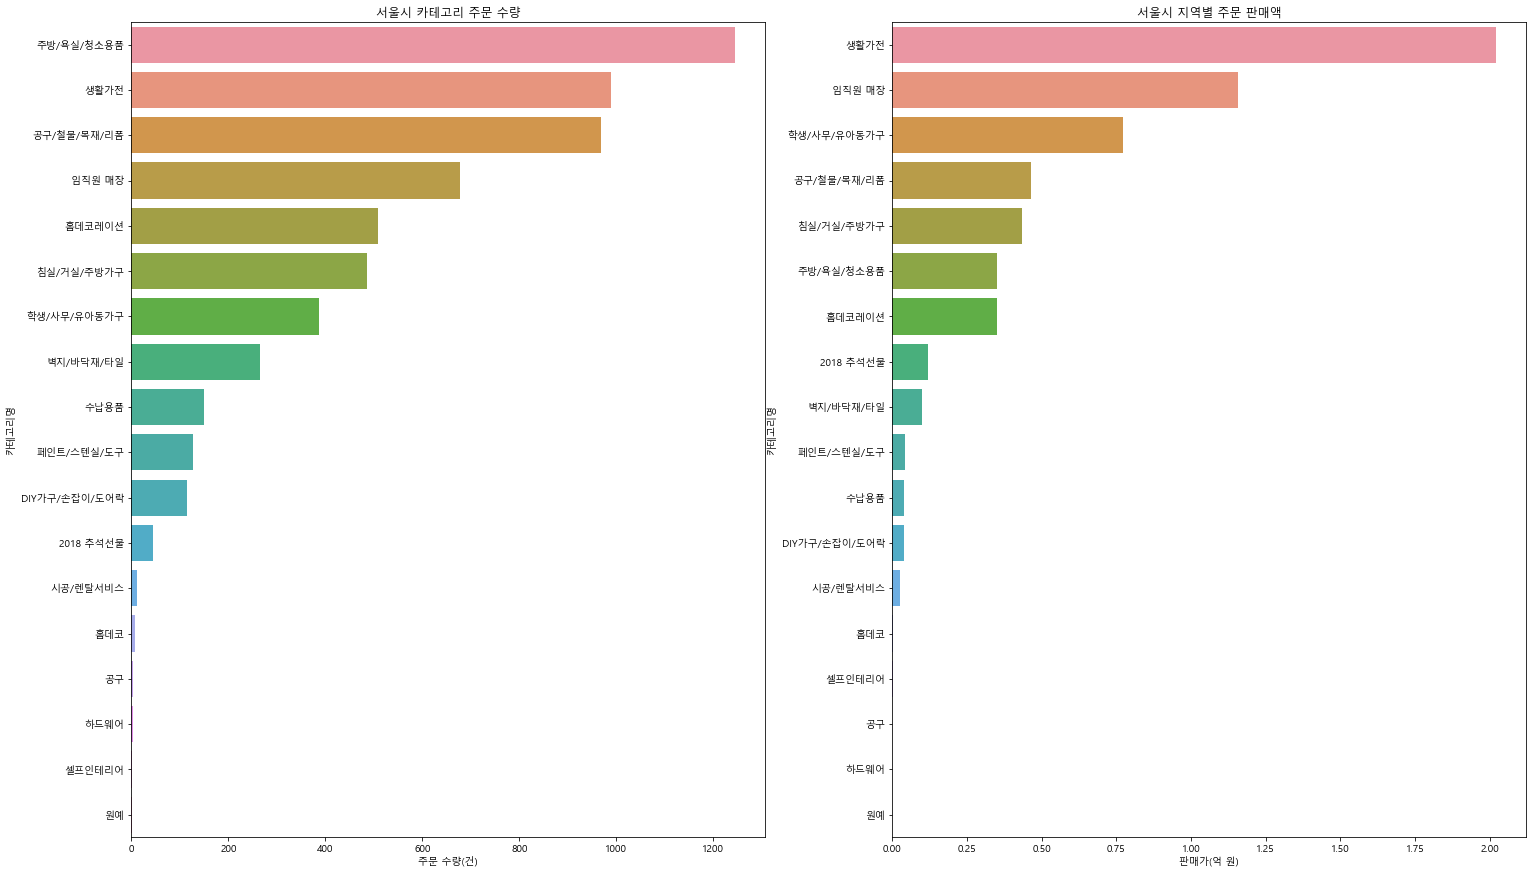

In [35]:
import matplotlib.ticker as mticker

plt.figure(figsize=(25, 15))
           
plt.subplot(1,2,1)
cart_order = sns.countplot(y = df_서울주문정보_사본['카테고리명'], order = df_서울주문정보_사본['카테고리명'].value_counts().index)
cart_order.set_xlabel('주문 수량(건)')
plt.title('서울시 카테고리 주문 수량')

plt.subplot(1,2,2)
x_value = df_카테고리_판매가['판매가']/100000000
local_tprice = sns.barplot(data=df_카테고리_판매가, x= x_value, y= '카테고리명')
local_tprice.set_xlabel('판매가(억 원)')
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))

plt.title('서울시 지역별 주문 판매액')
plt.show()

주문수량에 비해 생활 가전 쪽은 판매액이 높다

#### 브랜드 별 주문량 및 판매액(진행중)

In [36]:
df_브랜드_판매가 = pd.DataFrame(df_서울주문정보_사본.groupby('브랜드명').sum())
df_브랜드_판매가.reset_index(drop = False , inplace = True)
df_브랜드_판매가 = df_브랜드_판매가.sort_values('판매가', ascending = False)

In [37]:
df_브랜드_판매액 = df_브랜드_판매가.copy()

In [38]:
df_브랜드_주문량= df_서울주문정보_사본['브랜드명'].value_counts()

In [39]:
df_브랜드_판매가 = df_브랜드_판매가[df_브랜드_판매가['판매가'] >= 5000000]
df_브랜드_주문량 = pd.DataFrame(df_서울주문정보_사본['브랜드명'].value_counts())
df_브랜드_주문량.reset_index(drop = False , inplace = True)
df_브랜드_주문량 = df_브랜드_주문량[df_브랜드_주문량['브랜드명'] >= 100]
df_브랜드_주문량 =df_브랜드_주문량.rename(columns={'index':'브랜드명','브랜드명':'주문량'})

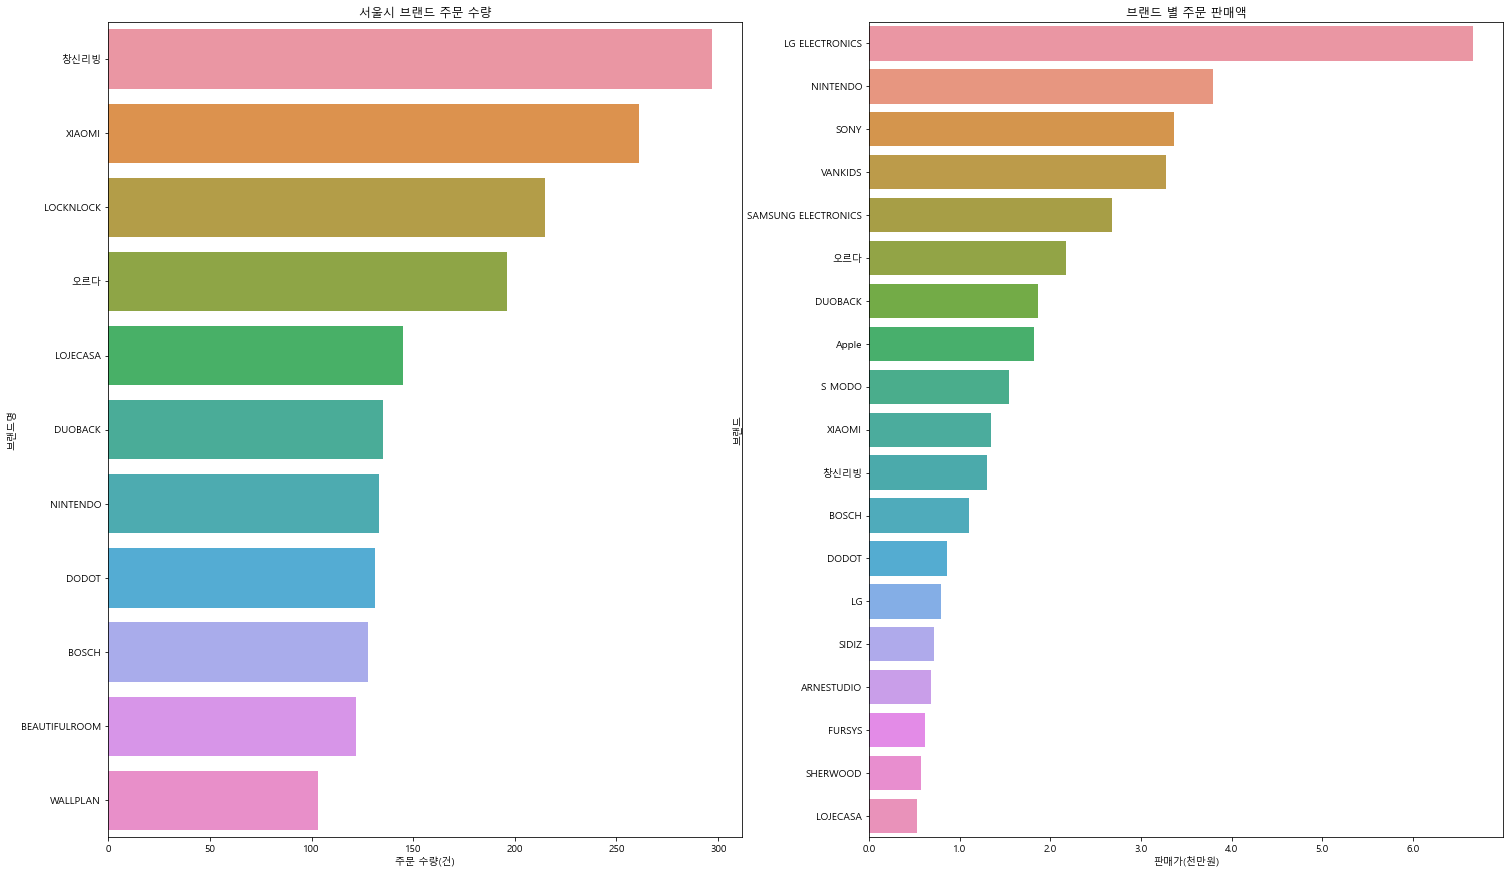

In [40]:
plt.figure(figsize=(25, 15))

plt.subplot(1,2,1)
cart_order = sns.barplot(data = df_브랜드_주문량, x = df_브랜드_주문량['주문량'], y = '브랜드명')
cart_order.set_xlabel('주문 수량(건)')

plt.title('서울시 브랜드 주문 수량')

plt.subplot(1,2,2)
x_value_gu = df_브랜드_판매가['판매가']/10000000
#cart_price = sns.countplot(x = df_카테고리_판매가['판매가'].index, order = df_카테고리_판매가['판매가'].value_counts())
cart_price = sns.barplot(data=df_브랜드_판매가, x= x_value_gu, y='브랜드명')
cart_price.set_xlabel('판매가(천만원)')
cart_price.set_ylabel('브랜드')
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

plt.title('브랜드 별 주문 판매액')
plt.show()

LG ELECTRONICS는 주문수량이 적음에도 불구하고 판매액이 제일 높음

#### 서울 지역별 판매액

In [41]:
df_구_판매가 = pd.DataFrame(df_서울주문정보_사본.groupby('gu').sum())
df_구_판매가.reset_index(drop = False , inplace = True)
df_구_판매가 = df_구_판매가.sort_values('판매가', ascending = False)

In [42]:
df_구_판매가['판매가'] = df_구_판매가['판매가'].astype('int64')

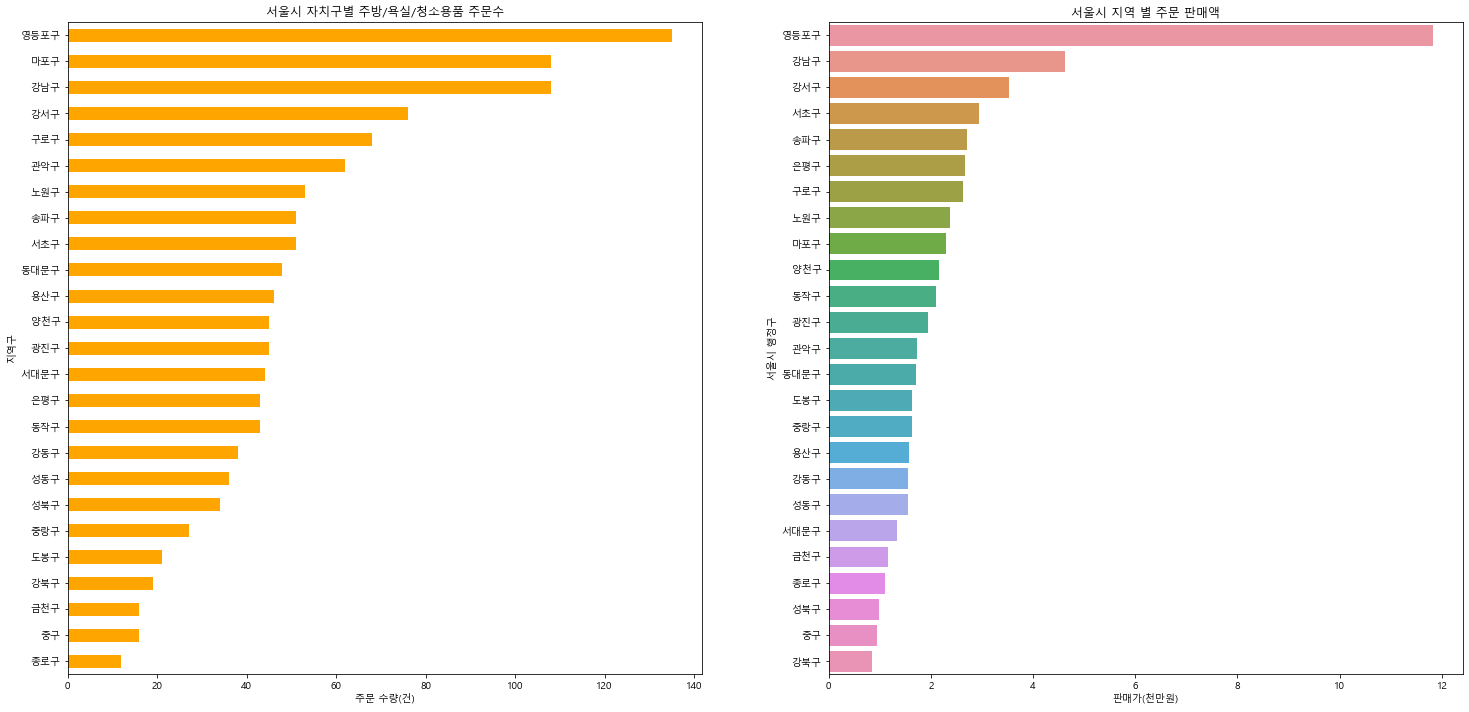

In [43]:
plt.figure(figsize=(25, 12))

plt.subplot(1,2,2)
plt.title('서울시 지역 별 주문 판매액')

x_value_gu = df_구_판매가['판매가']/10000000

cart_price = sns.barplot(data=df_구_판매가, x= x_value_gu, y='gu')
cart_price.set_xlabel('판매가(천만원)')
cart_price.set_ylabel('서울시 행정구')
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%i'))

plt.subplot(1,2,1)
plt.title('서울시 자치구별 주방/욕실/청소용품 주문수')
life_order = df_서울주문정보_사본.loc[df_서울주문정보_사본['카테고리명'] == '주방/욕실/청소용품'].groupby('gu')['카테고리명'].count()\
                                    .sort_values().plot(kind='barh',color = 'orange')
life_order.set_xlabel('주문 수량(건)')
life_order.set_ylabel('지역구')
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%i'))


plt.show()

#### 지역별 주방용품 주문량

영등포구가 가장 많이 생활용품을 주문하고, 종로구는 가장 적게 생활용품을 주문했습니다.

In [44]:
import folium

In [45]:
df_seoul_life = df_서울주문정보_사본[df_서울주문정보_사본['카테고리명'] == '주방/욕실/청소용품']
df_seoul_life['카테고리명'].unique()


array(['주방/욕실/청소용품'], dtype=object)

### 3. 워드클라우드 시각화

In [46]:
from wordcloud import WordCloud
korean_font_path = 'C:/Windows/Fonts/malgun.ttf'


In [47]:
df_서울주문정보_사본['카테고리명'].value_counts()

주방/욕실/청소용품       1245
생활가전              989
공구/철물/목재/리폼       968
임직원 매장            677
홈데코레이션            508
침실/거실/주방가구        487
학생/사무/유아동가구       387
벽지/바닥재/타일         265
수납용품              150
페인트/스텐실/도구        128
DIY가구/손잡이/도어락     115
2018 추석선물          44
시공/렌탈서비스           12
홈데코                 8
공구                  4
하드웨어                3
셀프인테리어              2
원예                  1
Name: 카테고리명, dtype: int64

#### 지역

-주문량 기준

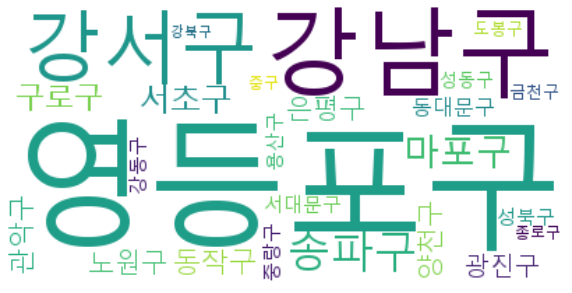

In [48]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

korean_font_path = 'C:/Windows/Fonts/malgun.ttf' # 한글 폰트(맑은 고딕) 파일명

# 워드 클라우드 이미지 생성
wc = WordCloud(font_path=korean_font_path, max_font_size = 100, background_color='white',
              width=400, height=200)

#지역정보 불러오기
order2 = df_서울주문정보_사본['gu'].value_counts()

frequencies = order2 # pandas의 Series 형식이 됨
wordcloud_image = wc.generate_from_frequencies(frequencies)

plt.figure(figsize=(10,12))
plt.axis('off')
plt.imshow(wordcloud_image, interpolation = 'bilinear')
plt.show()

영등포구는 카테고리 내 가장 많은 주문량을 보여준다

-판매량 기준

In [49]:
df_구_판매가['판매가'] =df_구_판매가['판매가'].astype('int64')
df_구_판매액 = df_구_판매가.groupby('gu').sum()

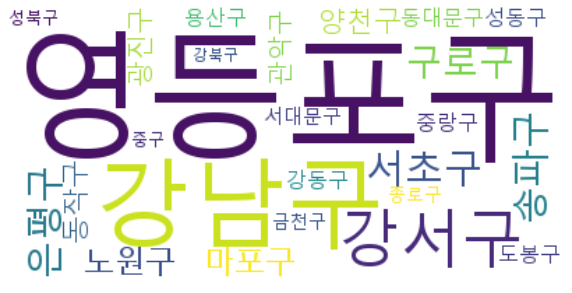

In [50]:
order2 = df_구_판매액['판매가']

frequencies = order2

wordcloud_image = wc.generate_from_frequencies(frequencies)
plt.figure(figsize=(10,12))
plt.axis('off')
plt.imshow(wordcloud_image, interpolation = 'bilinear')
plt.show()

#### 카테고리

-주문량 기준

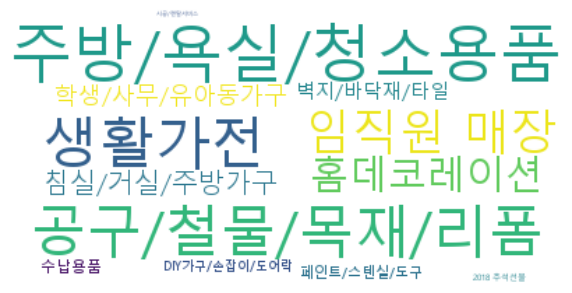

In [51]:
#카테고리 정보 불러오기

order = df_서울주문정보_사본['카테고리명'].value_counts()

frequencies = order
wordcloud_image = wc.generate_from_frequencies(frequencies)

plt.figure(figsize=(10,12))
plt.axis('off')
plt.imshow(wordcloud_image, interpolation = 'bilinear')
plt.show()

주문 수량 내에는 생활용품의 비중이 높다는 것을 알 수 있다

-판매액 기준

In [52]:
df_카테고리_판매가['판매가'] =df_카테고리_판매가['판매가'].astype('int64')
df_카테고리_판매액 = df_카테고리_판매가.groupby('카테고리명').sum()

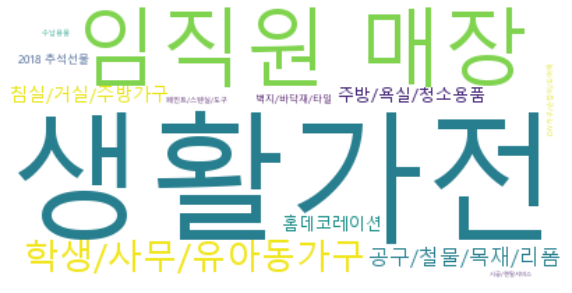

In [53]:
order = df_카테고리_판매액['판매가']

frequencies = order
wordcloud_image = wc.generate_from_frequencies(frequencies)

plt.figure(figsize=(10,12))
plt.axis('off')
plt.imshow(wordcloud_image, interpolation = 'bilinear')
plt.show()

#### 브랜드

-주문량 기준

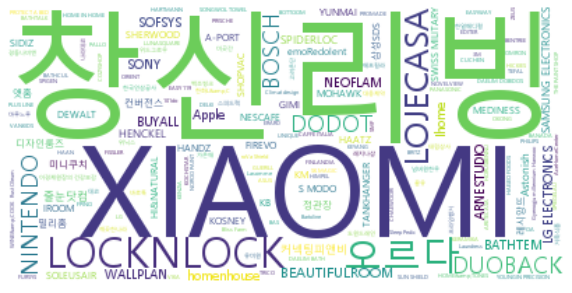

In [54]:
#브랜드
korean_font_path = 'C:/Windows/Fonts/malgun.ttf'

wc = WordCloud(font_path=korean_font_path, max_font_size = 100, background_color='white',
              width=400, height=200)


order = df_서울주문정보_사본['브랜드명'].value_counts()

frequencies = order
wordcloud_image = wc.generate_from_frequencies(frequencies)

plt.figure(figsize=(10,12))
plt.axis('off')
plt.imshow(wordcloud_image, interpolation = 'bilinear')
plt.show()

브랜드는 '창신리빙' 제일 많이 주문된다

-판매액 기준

In [55]:
df_브랜드_판매액['판매가'] =df_브랜드_판매액['판매가'].astype('int64')
df_브랜드_판매액 = df_브랜드_판매액.groupby('브랜드명').sum()

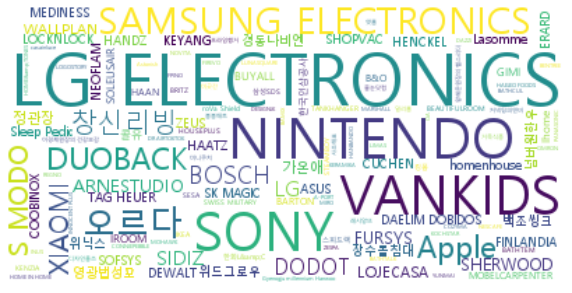

In [56]:
order2 = df_브랜드_판매액['판매가']

frequencies = order2

wordcloud_image = wc.generate_from_frequencies(frequencies)
plt.figure(figsize=(10,12))
plt.axis('off')
plt.imshow(wordcloud_image, interpolation = 'bilinear')
plt.show()

판매액이 높은 브랜드는 LG ELECTRONICS이다 주문량과는 다른 결과가 나온다

## 4. 지도 시각화

In [57]:
import requests
import json
from folium.plugins import MarkerCluster
import folium

In [58]:
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [59]:
seoul_group_data = df_서울주문정보_사본.loc[df_서울주문정보_사본['카테고리명'] == '주방/욕실/청소용품'].groupby('gu')['카테고리명'].count()

In [60]:
#지역별 생활용품 주문수량 지도 시각화
m1 = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=12, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m1)

marker_cluster = MarkerCluster().add_to(m1)
#choropleth로 표현
#bins = list(seoul_group_data.quantile([0, 0.25, 0.5, 0.75, 1]))#4분위
m1.choropleth(geo_data=seoul_geo,
             data=seoul_group_data, 
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="지역구별 생활용품 주문수",
             #bins=bins
            )

for lat, long in zip(df_seoul_life['lat'], df_seoul_life['lng']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)

m1



C:\Users\user\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


강남 지역에 주문량이 많이 몰려있음을 한번에 알 수 있다

# 4. 결과 및 결론 도출

1, 브랜드에 대한 결론

워드 클라우드를 기준으로 봤을 때, 주문량과 판매액은 비례할 때도 있고, 반비례할 때도 있다.

판매액이 압도적으로 높은 LG ELETRONICS를 보았을 때, 수요가 꽤 있는 비싼 제품을 만들어서 전략적으로 팔 필요가 있다고 여겨진다. 

2. 지역에 대한 결론

영등포구의 특성을 보았을 때, 지리적으로 산이 없어서 각종 시설이 들어서기 좋은 곳이다. 여의도라는 커다란 구역을 갖고 있기에 상업, 주거지역으로써의 역할이 꽤 큰 듯하다. 주요기관,기업 및 공공단체에서 물품을 주문하는 경우에 대량을 구매하는 경우가 많기 때문에 주문 판매액이 가장 높게 나왔다고 생각된다.

영등포구를 제외한 구역은 순서대로 나타나는 특징을 보았을 때, 개발 및 도심지일수록 판매액이 높음을 알 수 있다.

3. 카테고리에 대한 결론

생활과 밀접한 관련을 지닌 주방/가정용품의 주문량이 제일 많이 나왔는데, 이것은 주방/가정용품 카테고리에 소모품이 많다는 것을 보여준다.

가장 많은 생활용품을 주문하는 지역은 개발이 많이 된 지역이 많은 강남구 쪽임을 알 수 있다. 이것은 사람들의 인구 밀집도와 관련이 있을 듯하다. 만약 인구 밀도를 분석한다면 상관도가 높게 나올지도 모른다.

판매액은 브랜드와 마찬가지로 생활 가전쪽으로 높게 나왔다. 텔레비전, 냉장고 등 일상생활에 필수인 품목들이 주문량 대비 판매액이 높게 나오기 때문에, 생활가전은 워드 클라우드 기준 주문량이 적음에도 불구하고 가장 높은 판매액을 보여주었다.